In [36]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'/nfshome/mrn291/patrol_allocation'

In [3]:
files = os.listdir()

In [4]:
files = [file for file in files if file[-3:]=='csv']
names = [file[:-4] for file in files]

In [5]:
frames = []
for file, name in zip(files, names):
    name = pd.read_csv(file)
    frames.append(name)

In [6]:
files

['pluto.csv',
 'seven_majors.csv',
 'precinct_pop_m.csv',
 'area_model_results.csv',
 'crash_data.csv',
 'vacancy_only.csv',
 'felonies_09_14.csv',
 'complaint_data.csv',
 'calls_by_precinct.csv',
 'tract_precinct_key.csv',
 'age_precinct.csv',
 'gentrification_model_results.csv',
 'precinct_population_dayadjust.csv',
 'noise_complaints_aggregated.csv',
 'plutoSums.csv',
 'violent_crime_MODEL.csv',
 '2016_estimations.csv',
 'acs_other_demo_data.csv',
 'StopFrisk_10thru18R.csv',
 'adjusted_day_MODEL_RESULTS.csv']

### Model 1: Calls for Service + Violent Crime

In [12]:
calls = pd.read_csv('calls_by_precinct.csv')
violent = pd.read_csv('seven_majors.csv')

In [13]:
violent.columns = violent.columns.str.strip()

In [16]:
violent = violent.loc[:,['Precinct','2018_FELONY ASSAULT','2018_MURDER & NON NEGL. MANSLAUGHTER', '2018_RAPE','2018_ROBBERY']]

In [17]:
violent.columns

Index(['Precinct', '2018_FELONY ASSAULT',
       '2018_MURDER & NON NEGL. MANSLAUGHTER', '2018_RAPE', '2018_ROBBERY'],
      dtype='object')

In [18]:
violent['total_violent'] = violent.drop('Precinct', axis=1).sum(axis=1)

In [19]:
violent.head()

,Precinct,2018_FELONY ASSAULT,2018_MURDER & NON NEGL. MANSLAUGHTER,2018_RAPE,2018_ROBBERY,total_violent
0,1,61,1,23,80,165
1,5,122,1,7,85,215
2,6,121,1,20,153,295
3,7,153,0,15,118,286
4,9,149,0,40,85,274


In [20]:
calls.head()

,Precinct,january,february,march,april,may,june,july,august,september,october,november,december,total
0,1,13566,12094,13341,13834,14805,14038,14456,14608,13823,14026,12946,12413,163950
1,10,5474,4985,5748,5714,6550,6827,7281,7077,7158,7543,6166,6583,77106
2,100,2651,2048,2635,2441,3053,2991,3713,3354,2916,2781,2655,2658,33896
3,101,5110,4108,4805,4583,4908,5284,5846,5426,5940,5227,5405,4869,61511
4,102,9277,8768,9915,8639,9810,9322,9818,9939,8940,8951,8121,8326,109826


In [21]:
calls_violence_2018 = pd.merge(violent, calls, left_on='Precinct', right_on='Precinct')

In [24]:
calls_violence_2018 = calls_violence_2018.loc[:,['Precinct','total','total_violent']]

In [27]:
calls_violence_2018.rename(columns={'total':'total_calls_for_service'}, inplace=True)

In [29]:
calls_violence_2018['total'] = calls_violence_2018.total_calls_for_service + calls_violence_2018.total_violent
denom = calls_violence_2018.total.sum()

In [30]:
calls_violence_2018['share'] = calls_violence_2018.total.astype(float) / denom

In [32]:
calls_violence_2018['officers'] = round(calls_violence_2018.share * 20000)

In [34]:
calls_violence_2018.head()

,Precinct,total_calls_for_service,total_violent,total,share,officers
0,1,163950,165,164115,0.019832,397.0
1,5,80676,215,80891,0.009775,195.0
2,6,61731,295,62026,0.007495,150.0
3,7,56264,286,56550,0.006834,137.0
4,9,83233,274,83507,0.010091,202.0


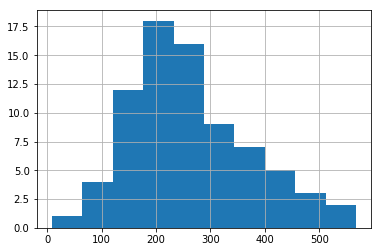

In [38]:
calls_violence_2018.officers.hist()

### Model 2: Crashes

In [39]:
crashes = pd.read_csv('crash_data.csv')

In [41]:
crashes = crashes.loc[:,['precinct','injuries2018','deaths2018']]

In [42]:
crashes['total'] = crashes.drop('precinct', axis=1).sum(axis=1)

In [43]:
denom = crashes.total.sum()

In [44]:
crashes['share'] = crashes.total.astype(float) / denom
crashes['officers'] = round(crashes.share * 20000)

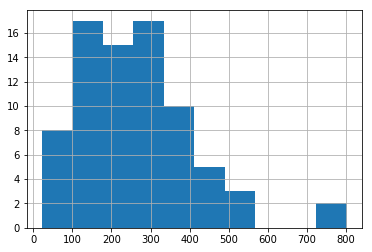

In [45]:
crashes.officers.hist()

### Model 3: Arrests and Violations

In [46]:
arrests = pd.read_csv('arrests_2018.csv')

In [50]:
violations = pd.read_csv('complaint_data.csv')

In [52]:
violations = violations.loc[:,['ADDR_PCT_CD','2017 VIOLATION']]

In [56]:
arrest_violation = pd.merge(violations, arrests, left_on='ADDR_PCT_CD', right_on='ARREST_PRECINCT')

In [57]:
arrest_violation.total = arrest_violation['2017 VIOLATION'] + 

,ADDR_PCT_CD,2017 VIOLATION,ARREST_PRECINCT,ARREST_KEY
0,1,716.0,1,2792
1,10,446.0,10,1954
2,100,381.0,100,1552
3,101,737.0,101,2701
4,102,868.0,102,3496
